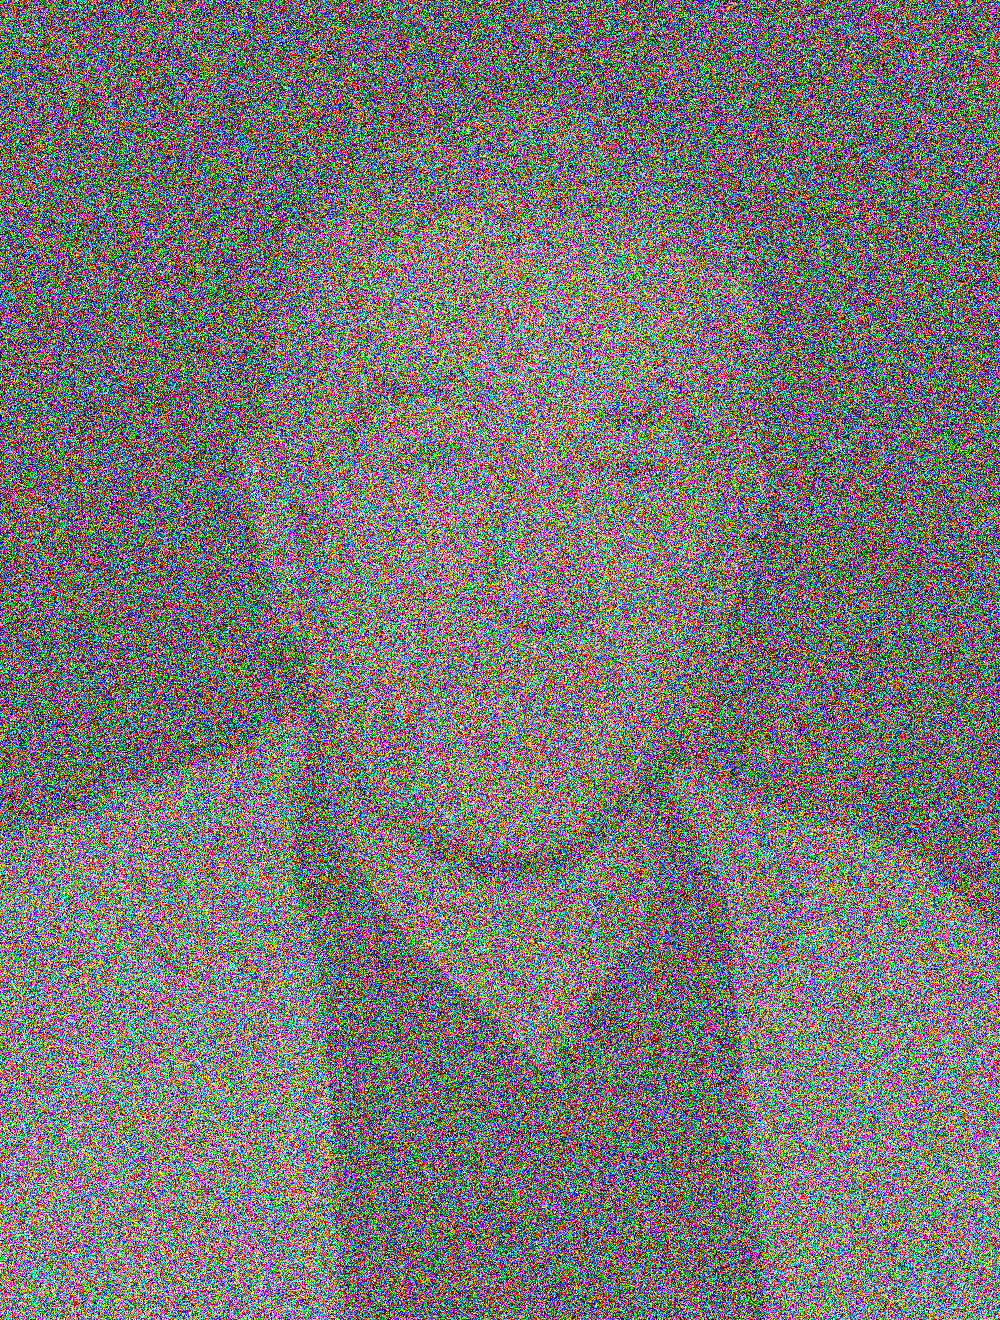

In [1]:
from ddpm import DDPMSampler

from PIL import Image
import torch
import numpy as np
import math

generator = torch.Generator()
generator.manual_seed(0)

ddpm_sampler = DDPMSampler(generator)

# How much noise to be put
noise_levels = [0, 10, 50, 75, 100, 250, 500, 750]

img = Image.open("../images/de_niro3.jpg")
img_tensor = torch.tensor(np.array(img))
img_tensor = ((img_tensor / 255.0) * 2.0) - 1.0
# Batch creation by means of repeat function
batch = img_tensor.repeat(len(noise_levels), 1, 1, 1)

timesteps = torch.tensor(noise_levels, dtype=torch.int, device=batch.device)
noise_imgs = []
epsilons = torch.randn(batch.shape, device=batch.device)
# Noisified Robert De Niro image
for i in range(len(timesteps)):
    a_hat = ddpm_sampler.alphas_cumprod[timesteps[i]]
    noise_imgs.append(
        (math.sqrt(a_hat) * batch[i]) + (math.sqrt(1 - a_hat) * epsilons[i])
    )


noise_imgs = torch.stack(noise_imgs, dim=0)
noise_imgs = (noise_imgs.clamp(-1, 1) + 1) / 2
noise_imgs = (noise_imgs * 255).type(torch.uint8)

#Show nosified image from array
display_img = Image.fromarray(noise_imgs[7].squeeze(0).numpy(), 'RGB')
display_img